In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
columns=['Class','Alcohol','Malic acid','Ash','Alcalinity_of_ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

# loading data

In [17]:
wine_data=pd.read_csv('wine.csv',names=columns,header=None)

# Analysing data

In [20]:
#making a copy of original dataset
wine_copy=wine_data.copy()
wine_copy.shape

(178, 14)

In [21]:
wine_copy.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity_of_ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


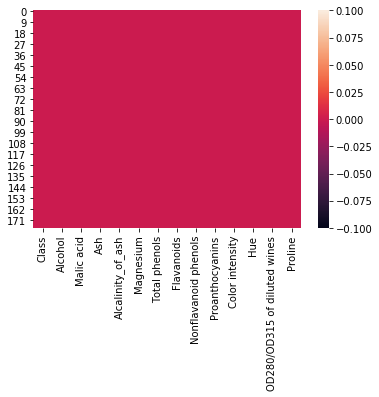

In [22]:
#chekcing for null values
import seaborn as sb
sb.heatmap(wine_copy.isna())

In [23]:
#Getting a statistical descriptioin of dataset
wine_copy.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity_of_ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Class                              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Alcohol                         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Malic acid                      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Ash                             AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Alcalinity_of_ash               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Magnesium                       AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total phenols                   AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Flavanoids                            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Nonflavanoid phenols               AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Proanthocyanins                    AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Color intensity                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Hue                                AxesSubplot(0.578659,0.125;0.0945122x0.343182)
OD280/OD315 of d

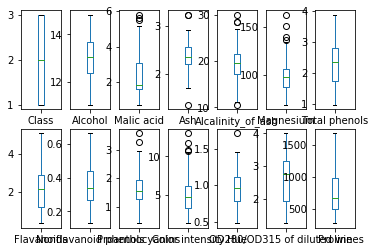

In [28]:
wine_copy.plot(kind='box',subplots=True,layout=(2,7))

# Data preprocessing

Removing Outliers

In [35]:
import scipy
from scipy.stats import zscore
z=abs(zscore(wine_copy))
wine_final=wine_copy[(z<3).all(axis=1)]
wine_copy.shape

(178, 14)

In [36]:
wine_final.shape

(168, 14)

# importing libraries to prepare model and to train it

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

preparing a function to find best random state for accuracy


In [71]:
def classification(dataset,test_size,model):
    max=0
    ind=0
    x=dataset.iloc[:,1:]
    y=dataset[['Class']]
    for i in range(100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < accuracy_score(test_y,pred)):
                max=accuracy_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('score :',model.score(train_x,train_y))
    print('Accuracy score :\n',accuracy_score(test_y,pred))
    print('Best accuracy at Random state :',ind)
    print('\nConfusion Matrix :\n',confusion_matrix(test_y,pred))
    print('\nclassification_report :\n',classification_report(test_y,pred))

Finding the best model which is giving highest accuracy among all

In [72]:
model_list=[LogisticRegression(),DecisionTreeClassifier(criterion='gini'),DecisionTreeClassifier(criterion='entropy'),
            SVC(kernel='rbf'),SVC(kernel='poly'),KNeighborsClassifier(),MultinomialNB(),SVC(kernel='linear')]
for i in model_list:
    print('\nResult for model :',i)
    classification(wine_final,0.25,i)


Result for model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score : 0.9603174603174603
Accuracy score :
 1.0
Best accuracy at Random state : 11

Confusion Matrix :
 [[16  0  0]
 [ 0 14  0]
 [ 0  0 12]]

classification_report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42


Result for model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
          

We can see that best accuracy is given by LogisticRegression at random state 11.Hence finalizing it

In [73]:
x=wine_final.iloc[:,1:]
y=wine_final[['Class']]
model=LogisticRegression()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=11)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('score :',model.score(train_x,train_y))
print('Accuracy score :\n',accuracy_score(test_y,pred))
print('\nConfusion Matrix :\n',confusion_matrix(test_y,pred))
print('\nclassification_report :\n',classification_report(test_y,pred))

score : 0.9603174603174603
Accuracy score :
 1.0

Confusion Matrix :
 [[16  0  0]
 [ 0 14  0]
 [ 0  0 12]]

classification_report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        12

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



# checking underfitting / overfitting

In [75]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(),x,y,cv=5,scoring='accuracy')
print('cross validation score is :',scores,scores.mean())

cross validation score is : [0.91176471 0.94117647 0.97058824 1.         1.        ] 0.9647058823529413


Hence looking at cross validation score we can conclude that model accuracy is correct and model can be considered

# Serialization

In [76]:
from sklearn.externals import joblib
joblib.dump(model,'wine_model')

['wine_model']